In [5]:
import pandas as pd
df = pd.read_csv('cleaned_reviews.csv')

df

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0
...,...,...,...,...
17335,positive,i love this speaker and love can take it anywh...,30,5.0
17336,positive,i use it in my house easy to connect and loud ...,13,4.0
17337,positive,the bass is good and the battery is amazing mu...,41,5.0
17338,positive,love it,2,5.0


In [13]:
sentiments = pd.get_dummies(df.sentiments)
df_baru = pd.concat([df, sentiments], axis=1)
df_baru = df_baru.drop(columns='sentiments')
df_baru
     

,cleaned_review,cleaned_review_length,review_score,negative,neutral,positive
0,i wish would have gotten one earlier love it a...,19,5.0,0,0,1
1,i ve learned this lesson again open the packag...,88,1.0,0,1,0
2,it is so slow and lags find better option,9,2.0,0,1,0
3,roller ball stopped working within months of m...,12,1.0,0,1,0
4,i like the color and size but it few days out ...,21,1.0,0,1,0
...,...,...,...,...,...,...
17335,i love this speaker and love can take it anywh...,30,5.0,0,0,1
17336,i use it in my house easy to connect and loud ...,13,4.0,0,0,1
17337,the bass is good and the battery is amazing mu...,41,5.0,0,0,1
17338,love it,2,5.0,0,0,1


In [14]:
df_baru = df_baru.drop(columns='cleaned_review_length')
df_baru = df_baru.drop(columns='review_score')
df_baru = df_baru.head(2000)
df_baru

,cleaned_review,negative,neutral,positive
0,i wish would have gotten one earlier love it a...,0,0,1
1,i ve learned this lesson again open the packag...,0,1,0
2,it is so slow and lags find better option,0,1,0
3,roller ball stopped working within months of m...,0,1,0
4,i like the color and size but it few days out ...,0,1,0
...,...,...,...,...
1995,i needed new mouse for my laptop and decided o...,0,1,0
1996,i ve been using it for less than hours and my ...,1,0,0
1997,love my led light up mouse it very quiet and n...,0,0,1
1998,great product,0,0,1


In [15]:
text = df_baru['cleaned_review'].values
label = df_baru[[ 'negative', 'neutral','positive']].values

In [16]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test,padding='post',maxlen=10,truncating='post')

In [32]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [34]:
history = model.fit(padded_latih, label_latih, epochs=50,validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
50/50 - 13s - loss: 1.0104 - accuracy: 0.4619 - val_loss: 0.9963 - val_accuracy: 0.5025 - 13s/epoch - 251ms/step
Epoch 2/50
50/50 - 9s - loss: 0.9412 - accuracy: 0.5487 - val_loss: 0.9357 - val_accuracy: 0.5850 - 9s/epoch - 171ms/step
Epoch 3/50
50/50 - 18s - loss: 0.6717 - accuracy: 0.7200 - val_loss: 0.8972 - val_accuracy: 0.5975 - 18s/epoch - 368ms/step
Epoch 4/50
50/50 - 10s - loss: 0.4496 - accuracy: 0.8394 - val_loss: 0.9811 - val_accuracy: 0.6050 - 10s/epoch - 191ms/step
Epoch 5/50
50/50 - 9s - loss: 0.3383 - accuracy: 0.8819 - val_loss: 1.0075 - val_accuracy: 0.5725 - 9s/epoch - 173ms/step
Epoch 6/50

Akurasi telah mencapai >90%!
50/50 - 8s - loss: 0.2236 - accuracy: 0.9181 - val_loss: 1.2854 - val_accuracy: 0.5575 - 8s/epoch - 162ms/step


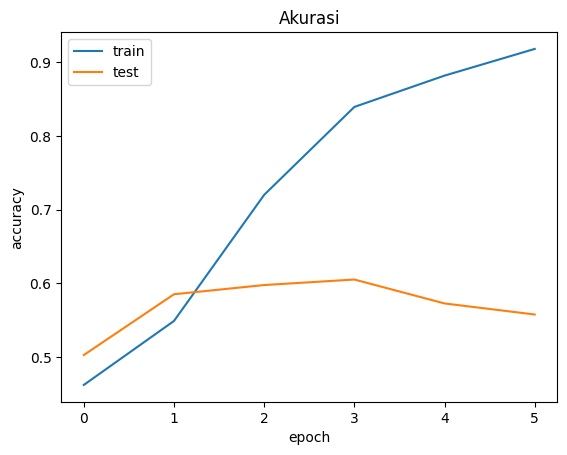

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

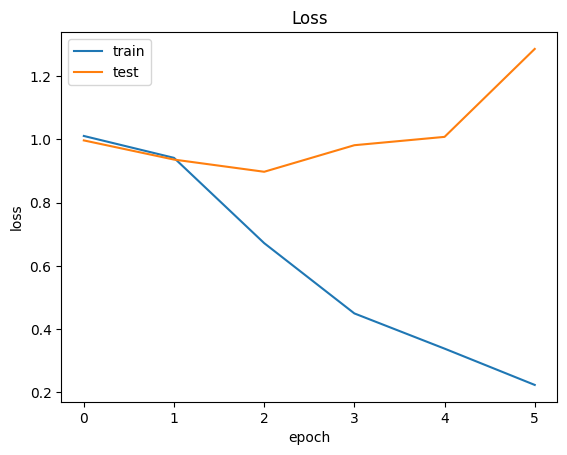

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()